In [44]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

In [77]:
Nt = 200
Nx = 10
Ny = 10

x = np.linspace(0,1,Nx)
y = np.linspace(0,1,Nx)
t = np.linspace(0,100,Nt)

deltax = x[1] - x[0]
deltay = y[1] - y[0]
deltat = t[1] - t[0]

k = 0.75

lambda_ = (k*deltat)/deltax**2
mu_ = (k*deltat)/deltay**2

print(lambda_,mu_)

30.52763819095477 30.52763819095477


In [78]:
def Ti(x,y):
    return 10*np.sin(np.pi*(x+y))

In [80]:
def InitT():
    
    T = np.zeros((Nt,Nx,Ny))
    
    T[0,:,:] = Ti(x,y)
    T[0,-1,:] = 100
    
    return T

In [81]:
T = InitT()

In [82]:
def GetSolution():
    
    for l in tqdm(range(1,len(t))):
        
        for i in range(1,len(x)-1):
            for j in range(1,len(y)-1):
                T[l,i,j] = (1-2*lambda_-2*mu_)*T[l-1,i,j] + \
                lambda_*(T[l-1,i+1,j] + T[l-1,i-1,j]) + \
                mu_*(T[l-1,i,j+1] + T[l-1,i,j-1])
                

<IPython.core.display.Javascript object>


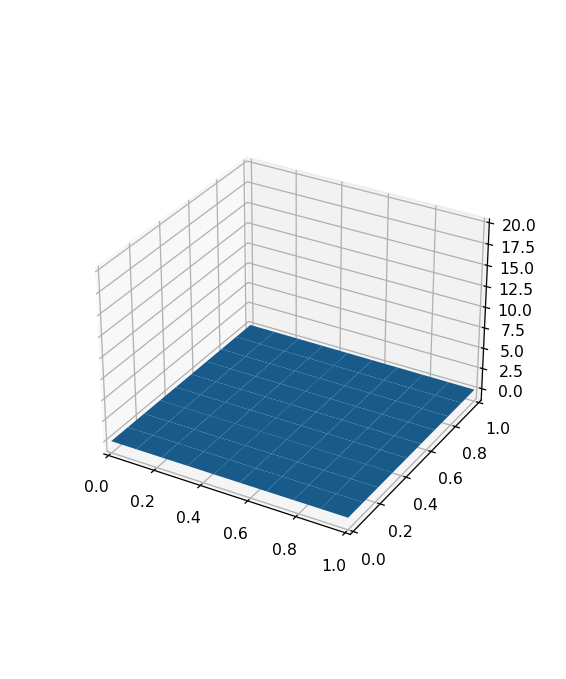

In [83]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)

def init():
    
    ax.clear()
    ax.set_xlim3d(0,1)
    ax.set_ylim3d(0,1)
    ax.set_zlim3d(-1,20)

def Update(i):

    init()
    ax.plot_surface(X,Y,T[i,:,:])
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)